# Lecture 3 
First: Necessary packages:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker # Ticks for x and y tickers
from scipy.stats import norm # SciPy Package is for scientific computing (we use the statistics tooling)
import seaborn as sns
from palmerpenguins import load_penguins

# Normal approximation

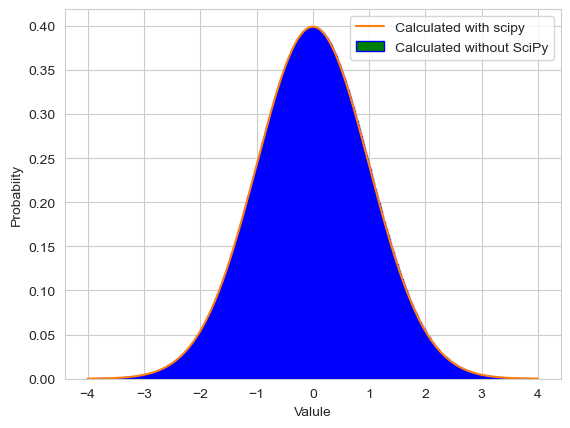

In [11]:
step = 0.01 # Stepsize for the arange function
x = np.arange(-4, 4 + step, step) #Step is added to include the last value (4) if it isnt specified itll only display up to 3.99
y = 1 / np.sqrt(2 * np.pi) * np.exp(-np.power(x, 2) / 2)
y2 = norm.pdf(x)
plt.bar(x, height= y, width=step, lw = 1, edgecolor = "blue", facecolor = "green", label = "Calculated without SciPy")
plt.plot(x, y2, color = "C1", zorder = 2, label = "Calculated with scipy")
plt.xlabel("Valule")
plt.ylabel("Probabiity")
plt.legend()
plt.show()

In [13]:
sum(y * step), norm.cdf(4) - norm.cdf(-4)

(0.9999379868967918, 0.9999366575163338)

In [15]:
y3 = norm.pdf(np.arange(-2, 2 + step, step))
sum(y3*step)

0.955037846072888

In [16]:
penguins = load_penguins()

## Apply function
**Approximation in practice with the `.apply` function

In [18]:
def normalize (row, df, key):
    return (row[key] - df[key].mean()) / df[key].std()

TypeError: 'method' object is not subscriptable

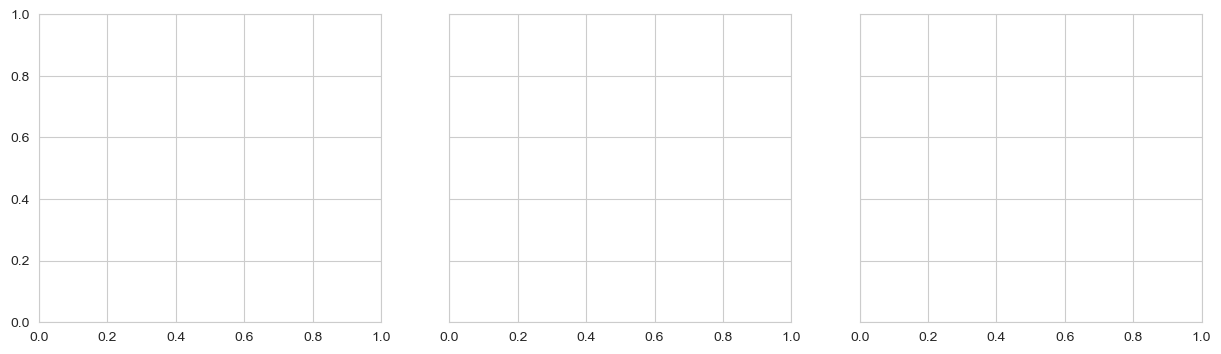

In [27]:
fig, axarr = plt.subplots(1, 3,  figsize = (15, 4), sharex = True, sharey = True)
species_df = {}
for i, c in enumerate(penguins.species.unique()):
    species_df[c] = penguins[penguins.species ==c].copy
    species_df[c]["flipper_sd"] = species_df[c]["flipper_length_mm"].apply(lambda x: normalize(x, species_df[c], "flipper_length_mm"))
    
    species_df[c].hist("flipper_sd", bins = np.arange(-4.1, 4.2, 0.2), density = True, ax = axarr[i], color = "C{]".format(i))
    
    axarr[i].plot(x, y2, color = "C3", zorder = 2)
    axarr[i].set_title(c)
    axarr.set_xlablel("Standard deviations away from mean")
    
axarr[0].set_ylabel("Density")